In [3]:
import os
from pathlib import Path
import torch, numpy as np, pandas as pd

In [4]:
iskaggle = os.environ.get("KAGGLE_KERNEL_RUN_TYPE", "")
if iskaggle:
    path = Path("../input/titanic")
else:
    path = Path("titanic")
    import kaggle, zipfile
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f"{path}.zip").extractall(path)

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
df = pd.read_csv(path/"train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [15]:
df.fillna(modes, inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
display(df.describe(include=np.number))
display(df.describe(include=object))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


<Axes: >

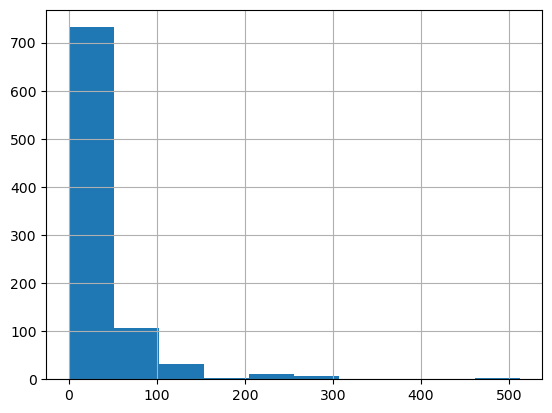

In [19]:
df["Fare"].hist()

<Axes: >

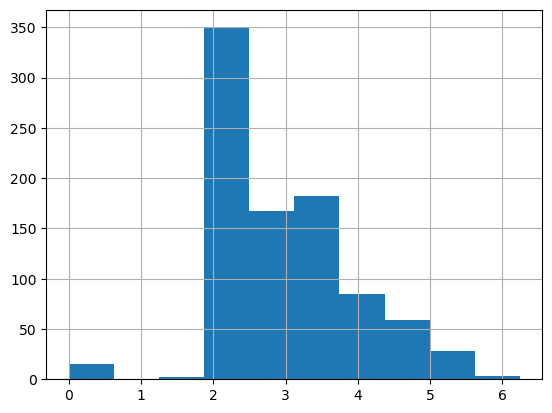

In [21]:
df["LogFare"] = np.log1p(df["Fare"])
df.LogFare.hist()

In [23]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [ ]:
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"])

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [29]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True


In [56]:
t_dep = torch.tensor(df.Survived, dtype=torch.float)

In [70]:
indep_cols = added_cols + ["Age", "SibSp", "Parch", "LogFare"]
t_indep = torch.tensor(df[indep_cols].values.astype(float), dtype=torch.float)

In [71]:
t_dep.shape, t_indep.shape

(torch.Size([891]), torch.Size([891, 12]))

In [72]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [73]:
t_indep*coeffs

tensor([[-0.0000,  0.1386,  0.0000,  ..., -0.4392,  0.0000,  0.7650],
        [-0.4629,  0.0000,  0.2409,  ..., -0.4392,  0.0000,  1.5518],
        [-0.4629,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.7935],
        ...,
        [-0.4629,  0.0000,  0.0000,  ..., -0.4392,  0.4206,  1.1588],
        [-0.0000,  0.1386,  0.2409,  ..., -0.0000,  0.0000,  1.2449],
        [-0.0000,  0.1386,  0.0000,  ..., -0.0000,  0.0000,  0.7863]])

In [74]:
vals, indices = t_indep.max(0)
t_indep = t_indep / vals

In [75]:
preds = (t_indep*coeffs).sum(1)
preds[:10]

tensor([ 0.3335, -0.2100, -0.1945,  0.3909,  0.4393,  0.5774,  1.1124,  0.2460,
        -0.1030, -0.8101])

In [77]:
loss = (preds - t_dep).abs().mean()
loss

tensor(0.6186)

In [78]:
def calc_preds(w, x): return (w*x).sum(1)
def calc_loss(w, x, y): return (calc_preds(w, x) - y).abs().mean()

In [79]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [90]:
loss = calc_loss(coeffs, t_indep, t_dep)

In [91]:
loss.backward()
loss

tensor(0.6186, grad_fn=<MeanBackward0>)

In [92]:
coeffs.grad

tensor([-0.3277,  0.3535, -0.0224, -0.0202,  0.0685, -0.1324,  0.0056,  0.1526,
         0.0352, -0.0062, -0.0112, -0.0191])

In [93]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5653)


In [94]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed=42)(df)

In [97]:
trn_indep, trn_dep = t_indep[trn_split], t_dep[trn_split]
val_indep, val_dep = t_indep[val_split], t_dep[val_split]

In [98]:
trn_indep.shape, trn_dep.shape, val_indep.shape, val_dep.shape

(torch.Size([713, 12]),
 torch.Size([713]),
 torch.Size([178, 12]),
 torch.Size([178]))

In [99]:
def update_coeffs(w, lr):
    w.sub_(w.grad*lr)
    w.grad.zero_()

In [100]:
def one_epoch(w, lr):
    loss = calc_loss(w, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(w, lr)
    print(f"{loss:.4f}", end="; ")

In [107]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [108]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for _ in range(epochs): one_epoch(coeffs, lr)
    return coeffs

In [109]:
coeffs = train_model(18, 0.2)

0.6154; 0.5633; 0.5173; 0.4743; 0.4378; 0.4149; 0.4058; 0.3780; 0.3731; 0.3617; 0.3589; 0.3471; 0.3463; 0.3378; 0.3360; 0.3296; 0.3303; 0.3202; 

In [110]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Sex_female': tensor(0.1587),
 'Sex_male': tensor(-0.2334),
 'Pclass_1': tensor(0.2819),
 'Pclass_2': tensor(-0.1448),
 'Pclass_3': tensor(-0.1359),
 'Embarked_C': tensor(0.1049),
 'Embarked_Q': tensor(0.4208),
 'Embarked_S': tensor(0.2103),
 'Age': tensor(0.2357),
 'SibSp': tensor(-0.3944),
 'Parch': tensor(0.2343),
 'LogFare': tensor(0.4977)}

In [111]:
preds = calc_preds(coeffs, val_indep)

In [113]:
results = val_dep.bool() == (preds >= 0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True, False,  True,  True, False,
        False, False, False,  True,  True,  True])

In [114]:
results.float().mean()

tensor(0.7753)

In [117]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep) >= 0.5)).float().mean()
acc(coeffs)

tensor(0.7753)

In [118]:
preds[:10]

tensor([ 0.7121,  0.2952, -0.0256,  0.2290,  0.1163,  0.1295,  0.3913,  0.5172,
        -0.0159,  0.4395])

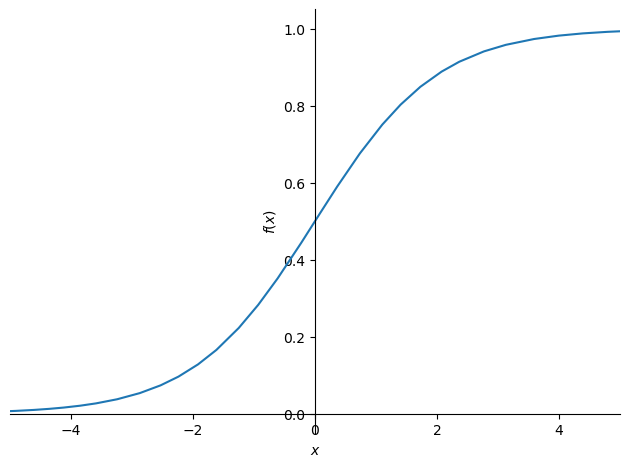

In [119]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5, 5))

In [122]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(1))

In [134]:
coeffs = train_model(epochs=50, lr=100)

0.5418; 0.3184; 0.2530; 0.2047; 0.2006; 0.1988; 0.1977; 0.1969; 0.1963; 0.1959; 0.1956; 0.1953; 0.1951; 0.1950; 0.1948; 0.1947; 0.1946; 0.1945; 0.1944; 0.1943; 0.1942; 0.1942; 0.1941; 0.1940; 0.1940; 0.1939; 0.1939; 0.1938; 0.1938; 0.1938; 0.1937; 0.1937; 0.1937; 0.1936; 0.1936; 0.1936; 0.1936; 0.1935; 0.1935; 0.1935; 0.1935; 0.1934; 0.1934; 0.1934; 0.1934; 0.1934; 0.1933; 0.1933; 0.1933; 0.1933; 

In [135]:
acc(coeffs)

tensor(0.8258)

In [136]:
show_coeffs()

{'Sex_female': tensor(8.5226),
 'Sex_male': tensor(-9.8037),
 'Pclass_1': tensor(3.0954),
 'Pclass_2': tensor(2.3893),
 'Pclass_3': tensor(-6.6899),
 'Embarked_C': tensor(1.8336),
 'Embarked_Q': tensor(2.7502),
 'Embarked_S': tensor(-5.0542),
 'Age': tensor(-0.9289),
 'SibSp': tensor(-1.8146),
 'Parch': tensor(-0.6263),
 'LogFare': tensor(0.8010)}

In [137]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [138]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [141]:
trn_dep = trn_dep.unsqueeze(1)

In [144]:
trn_dep.shape

torch.Size([713, 1])

In [145]:
val_dep = val_dep.unsqueeze(1)

In [146]:
val_dep.shape

torch.Size([178, 1])

In [147]:
coeffs = train_model(lr=100)

0.5156; 0.3225; 0.2874; 0.2042; 0.1999; 0.1983; 0.1974; 0.1967; 0.1962; 0.1958; 0.1955; 0.1953; 0.1951; 0.1949; 0.1948; 0.1947; 0.1945; 0.1944; 0.1943; 0.1943; 0.1942; 0.1941; 0.1941; 0.1940; 0.1939; 0.1939; 0.1938; 0.1938; 0.1938; 0.1937; 

In [148]:
acc(coeffs)

tensor(0.8258)

In [149]:
show_coeffs()

{'Sex_female': tensor([8.6240]),
 'Sex_male': tensor([-10.0646]),
 'Pclass_1': tensor([3.3869]),
 'Pclass_2': tensor([1.8092]),
 'Pclass_3': tensor([-6.5791]),
 'Embarked_C': tensor([1.5563]),
 'Embarked_Q': tensor([2.0277]),
 'Embarked_S': tensor([-4.8935]),
 'Age': tensor([-1.0580]),
 'SibSp': tensor([-1.2216]),
 'Parch': tensor([-0.6129]),
 'LogFare': tensor([0.5181])}

In [150]:
def init_coeffs(n_hidden=20):
    layer1 = torch.rand(n_coeff, n_hidden) - 0.5
    layer2 = torch.rand(n_hidden, 1) - 0.5
    return layer1.requires_grad_(), layer2.requires_grad_()

In [151]:
import torch.nn.functional as F

def calc_preds(w, x):
    l1, l2 = w
    a1 = F.relu(x@l1)
    a2 = a1@l2
    return torch.sigmoid(a2)

In [152]:
def update_coeffs(w, lr):
    for l in w:
        l.sub_(l.grad*lr)
        l.grad.zero_()

In [155]:
coeffs = train_model(lr=1.4)

0.5068; 0.4664; 0.4297; 0.3985; 0.3738; 0.3554; 0.3413; 0.3295; 0.3187; 0.3083; 0.2980; 0.2881; 0.2789; 0.2703; 0.2626; 0.2558; 0.2500; 0.2450; 0.2409; 0.2375; 0.2345; 0.2320; 0.2299; 0.2280; 0.2263; 0.2249; 0.2236; 0.2224; 0.2214; 0.2204; 

In [156]:
acc(coeffs)

tensor(0.8146)

In [280]:
def init_coeffs():
    hiddens = [10 for _ in range(100)]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [torch.rand(sizes[i], sizes[i+1])-0.5 for i in range(n-1)]
    for l in layers: l.requires_grad_()
    return layers

In [281]:
def calc_preds(coeffs, indeps):
    layers = coeffs
    n = len(layers)
    x = indeps
    for i, l in enumerate(layers):
        x = x@l
        if i != n-1: x = F.relu(x)
    return torch.sigmoid(x)

In [282]:
def update_coeffs(coeffs, lr):
    for l in coeffs:
        l.sub_(l.grad*lr)
        l.grad.zero_()

In [283]:
coeffs = train_model(lr=4)

0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 0.5000; 

In [272]:
acc(coeffs)

tensor(0.5955)

In [302]:
from fastai.tabular.all import *
set_seed(42)

In [311]:
df = pd.read_csv(path/'train.csv')

In [312]:
def add_features(df):
    df['LogFare'] = np.log1p(df['Fare'])
    df['Deck'] = df.Cabin.str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E="DE", F="FG", G="FG"))
    df['Family'] = df.SibSp+df.Parch
    df['Alone'] = df.Family==1
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master")).value_counts(dropna=False)

add_features(df)

In [313]:
splits = RandomSplitter(seed=42)(df)

In [314]:
dls = TabularPandas(df, 
                   splits=splits,
                   procs=[Categorify, FillMissing, Normalize],
                   cat_names=["Sex", "Pclass", "Embarked", "Deck", "Title"],
                   cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'],
                   y_names="Survived", 
                   y_block=CategoryBlock()
).dataloaders(path=".")

In [315]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10 for _ in range(100)])

SuggestedLRs(slide=0.14454397559165955, valley=0.02290867641568184)

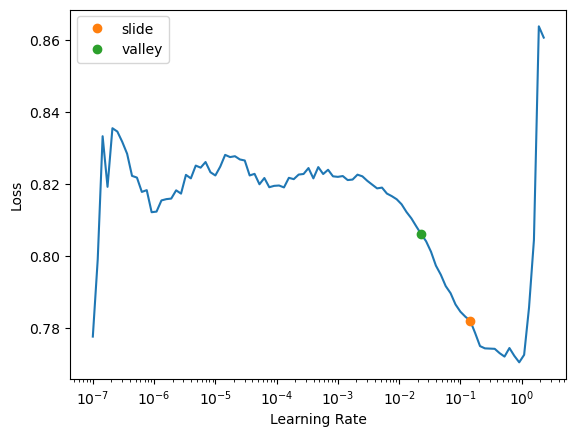

In [316]:
learn.lr_find(suggest_funcs=(slide, valley))

In [317]:
learn.fit(64, lr=0.03)

epoch     train_loss  valid_loss  accuracy  time    
0         0.733456    0.676968    0.595506  00:00                                         
1         0.698265    0.675249    0.595506  00:01                                         
2         0.685243    0.690664    0.589888  00:00                                         
3         0.681704    0.686586    0.601124  00:00                                         
4         0.678296    0.683896    0.595506  00:00                                         
5         0.676093    0.694781    0.505618  00:00                                         
6         0.674690    0.677431    0.595506  00:00                                         
7         0.670599    0.686498    0.589888  00:00                                         
8         0.669044    0.682344    0.595506  00:00                                         
9         0.668804    0.674054    0.595506  00:00                                          
10        0.667801    0.673644    0.